In [3]:
import pandas as pd
from plotnine import *
import numpy as np
import multiprocessing
from adjustText import adjust_text

## Fig 6: t-SNE embedding with archaelogical samples

In [1]:
s = "../../data/sourcepredict/sourcepredict_embedding.csv"
s_pred = "../../data/sourcepredict/prediction.sourcepredict.csv"

In [4]:
sp = pd.read_csv(s, index_col=0)

In [5]:
spp = pd.read_csv(s_pred, index_col=0).T

In [6]:
conditions = [(spp['Canis_familiaris'] > 0.5) ,
              (spp['Homo_sapiens'] > 0.5),
              (spp['Soil'] > 0.5),
              (spp['unknown'] > 0.5)
             ]
choices = ['Canis familiaris', 'Homo sapiens', 'Soil', 'Unknown']
spp['Predicted organism'] = np.select(conditions, choices, default='Unknown')

In [7]:
sp['organism'] = sp.drop(spp.index, axis=0)['labels'].append(spp['Predicted organism'])

In [8]:
sp['ml'] = np.where(sp['labels'] == 'sink', 'predicted', 'reference')

In [9]:
sp['organism'].value_counts()

Homo_sapiens        262
Canis_familiaris    150
Soil                 26
Homo sapiens          8
Unknown               5
Canis familiaris      2
Name: organism, dtype: int64

In [10]:
sp['organism'] = sp['organism'].str.replace('_'," ")

In [11]:
sp.sample(10)

,PC1,PC2,labels,name,organism,ml
BRF001,-12.659374,-35.260160,sink,BRF001,Soil,predicted
SRR1761698,-20.741577,3.050676,Homo_sapiens,SRR1761698,Homo sapiens,reference
ERR1916193,27.776525,-1.021203,Canis_familiaris,ERR1916193,Canis familiaris,reference
SRR7658648,-13.075557,-8.574438,Homo_sapiens,SRR7658648,Homo sapiens,reference
ERR1916315,21.396618,9.574379,Canis_familiaris,ERR1916315,Canis familiaris,reference
AHP003,-12.097717,-35.152150,sink,AHP003,Soil,predicted
MLP001,-6.291108,-30.472930,sink,MLP001,Unknown,predicted
SRR2195742,-20.952112,-7.702335,Homo_sapiens,SRR2195742,Homo sapiens,reference
SRR059395,-1.323847,28.240078,Homo_sapiens,SRR059395,Homo sapiens,reference
AHP001,-8.097011,-31.538100,sink,AHP001,Unknown,predicted


In [13]:
sp_ref = sp.query('ml == "reference"')
sp_pred = sp.query('ml == "predicted"')

In [14]:
sample_type = pd.DataFrame({
    'AHP003':['Coprolite', '11' ],
    'CMN001':['Archaelogical sediment','20'],
    'ZSM005':['Coprolite','02'],
    'ZSM002':['Coprolite','01'],
    'ZSM029':['Coprolite','07'],
    'YRK001':['Coprolite','13'],
    'ZSM025':['Coprolite','04'],
    'TRO001':['Archaelogical sediment','14'],
    'ZSM028':['Coprolite','06'],
    'ZSM031':['Coprolite','08'],
    'ZSM023':['Coprolite','03'],
    'ECO004':['Archaelogical sediment','19'],
    'AHP001':['Coprolite','09'],
    'AHP002':['Coprolite','10'],
    'CBA001':['Archaelogical sediment','16'],
    'LEI010':['Archaelogical sediment','18'],
    'AHP004':['Coprolite','12'],
    'DRL001':['Archaelogical sediment','15'],
    'ZSM027':['Coprolite','05'],
    'BRF001':['Archaelogical sediment','17'],
    'MLP001':['Archaelogical sediment','21'],
}, index = ['sample_type','plot_id'])

In [15]:
sp_pred = sp_pred.merge(sample_type.T, left_index=True, right_index=True)

In [16]:
sp_pred['plot_id'].sort_values()

ZSM002    01
ZSM005    02
ZSM023    03
ZSM025    04
ZSM027    05
ZSM028    06
ZSM029    07
ZSM031    08
AHP001    09
AHP002    10
AHP003    11
AHP004    12
YRK001    13
TRO001    14
DRL001    15
CBA001    16
BRF001    17
LEI010    18
ECO004    19
CMN001    20
MLP001    21
Name: plot_id, dtype: object

In [17]:
sp_pred['organism'].value_counts()

Homo sapiens        8
Soil                6
Unknown             5
Canis familiaris    2
Name: organism, dtype: int64

In [18]:
sp_pred.query("organism == 'Canis familiaris'")

,PC1,PC2,labels,name,organism,ml,sample_type,plot_id
AHP004,7.463623,-7.275122,sink,AHP004,Canis familiaris,predicted,Coprolite,12
YRK001,12.980815,1.274512,sink,YRK001,Canis familiaris,predicted,Coprolite,13


In [19]:
sp_pred.query("organism == 'Soil' and sample_type == 'Archaelogical sediment'")

,PC1,PC2,labels,name,organism,ml,sample_type,plot_id
BRF001,-12.659374,-35.260160,sink,BRF001,Soil,predicted,Archaelogical sediment,17
LEI010,-6.298735,-30.463503,sink,LEI010,Soil,predicted,Archaelogical sediment,18
TRO001,-9.569360,-31.206976,sink,TRO001,Soil,predicted,Archaelogical sediment,14
CBA001,-8.971134,-35.102470,sink,CBA001,Soil,predicted,Archaelogical sediment,16


In [20]:
sp_pred.query("sample_type == 'Archaelogical sediment'")

,PC1,PC2,labels,name,organism,ml,sample_type,plot_id
BRF001,-12.659374,-35.260160,sink,BRF001,Soil,predicted,Archaelogical sediment,17
DRL001,-6.732208,-35.138317,sink,DRL001,Unknown,predicted,Archaelogical sediment,15
LEI010,-6.298735,-30.463503,sink,LEI010,Soil,predicted,Archaelogical sediment,18
ECO004,-9.556790,-34.750652,sink,ECO004,Unknown,predicted,Archaelogical sediment,19
MLP001,-6.291108,-30.472930,sink,MLP001,Unknown,predicted,Archaelogical sediment,21
TRO001,-9.569360,-31.206976,sink,TRO001,Soil,predicted,Archaelogical sediment,14
CMN001,-8.172891,-35.017400,sink,CMN001,Unknown,predicted,Archaelogical sediment,20
CBA001,-8.971134,-35.102470,sink,CBA001,Soil,predicted,Archaelogical sediment,16


In [21]:
sp_pred.sort_values("plot_id").merge(spp, left_index=True, right_index=True)[['PC1','PC2','Canis_familiaris','Homo_sapiens','Soil','unknown','Predicted organism','plot_id']].to_csv('sourcepredict_results.csv')

In [33]:
adj_text = sp_pred.query("plot_id == ['01','03']")

/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:720: PlotnineWarning: Filename: results/figure6.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:735: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig(filename, **fig_kwargs)


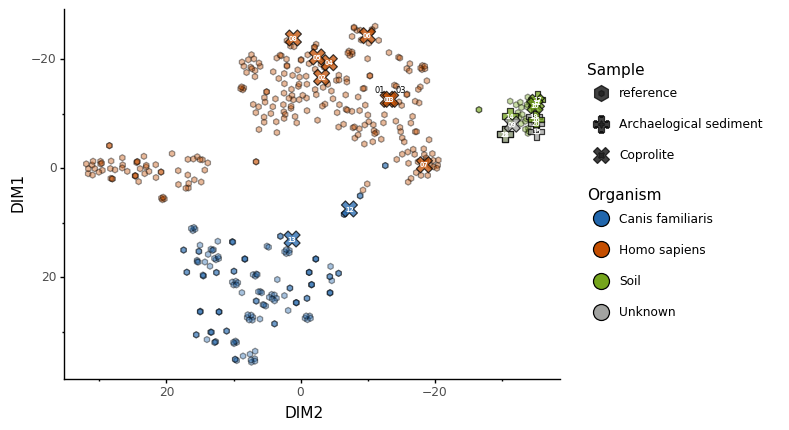

<ggplot: (8728082450338)>

In [37]:
p = ggplot(sp_ref, aes(x='PC1',y='PC2')) + geom_point(aes(fill='organism', shape='ml'), stroke=0.5, color='black', size = 2, alpha=0.4)
p = p + geom_point(data = sp_pred, mapping=aes(x='PC1',y='PC2', fill='organism', shape='sample_type'), stroke=0.5, color='black', size = 6, alpha=0.75)
p = p + geom_text(data = adj_text, mapping= aes(x='PC1', y='PC2', label = 'plot_id'), size=6, adjust_text= {
    'expand_points': (2, 2),
    'expand_objects': (1.5, 2),
    'arrowprops': {
        'arrowstyle': '-',
        'color': 'grey'
    },
    'on_basemap':True
})
p = p + geom_text(data = sp_pred, mapping=aes(x='PC1',y='PC2', label='plot_id'), size = 4.5,fontweight = 'bold', color='white')
p = p + scale_shape_manual(name='Sample', values={'Coprolite':'X', 'Archaelogical sediment':'P', 'reference':'h'}) + theme_classic() + labs(x='DIM1',y='DIM2')
p = p + scale_fill_manual(name = 'Organism', values = {"Canis familiaris":"#2166ac","Homo sapiens":"#c44e00", "Soil":"#75a51c", 'Unknown':'#a2a3a1'})
p = p + guides(fill = guide_legend(override_aes = {'alpha':1}))
p = p + coord_flip() + scale_y_reverse() + scale_x_reverse()
p.save("results/figure6.png", dpi=300)
p